In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pandas import DataFrame

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM



from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [10]:
azn_df = yf.download("AZN.L", start="2010-01-01", end="2022-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [11]:
azn_adj = azn_df[['Adj Close']]
azn_adj=azn_adj.reset_index(level=0) 
azn_adj

,Date,Adj Close
0,2009-12-31,1681.68
1,2010-01-04,1699.30
2,2010-01-05,1679.94
3,2010-01-06,1661.16
4,2010-01-07,1681.68
...,...,...
3029,2021-12-23,8457.35
3030,2021-12-24,8472.10
3031,2021-12-29,8516.38
3032,2021-12-30,8533.10


In [12]:
split = int(0.8*len(azn_adj))

In [13]:
train, test = azn_adj[:split], azn_adj[split:]

In [14]:
azn_adj.shape, train.shape, test.shape

((3034, 2), (2427, 2), (607, 2))

In [15]:
preds = []
for i in range(0,607):
    a = train[len(train)-504+i:].sum() + sum(preds)
    b = a/607
    preds.append(b)

ConversionError: Failed to convert value(s) to axis units: array([Adj Close    4123.393097
dtype: float64,
       Adj Close    4123.93872
dtype: float64,
       Adj Close    4124.448191
dtype: float64,
       Adj Close    4124.892241
dtype: float64,
       Adj Close    4125.321338
dtype: float64,
       Adj Close    4125.7319
dtype: float64,
       Adj Close    4126.191591
dtype: float64,
       Adj Close    4126.693372
dtype: float64,
       Adj Close    4127.17318
dtype: float64,
       Adj Close    4127.566843
dtype: float64,
       Adj Close    4127.897744
dtype: float64,
       Adj Close    4128.287625
dtype: float64,
       Adj Close    4128.688115
dtype: float64,
       Adj Close    4129.144125
dtype: float64,
       Adj Close    4129.475483
dtype: float64,
       Adj Close    4129.733993
dtype: float64,
       Adj Close    4130.008612
dtype: float64,
       Adj Close    4130.295084
dtype: float64,
       Adj Close    4130.577745
dtype: float64,
       Adj Close    4130.579422
dtype: float64,
       Adj Close    4130.558301
dtype: float64,
       Adj Close    4130.39464
dtype: float64,
       Adj Close    4130.180842
dtype: float64,
       Adj Close    4130.079987
dtype: float64,
       Adj Close    4130.035242
dtype: float64,
       Adj Close    4130.113703
dtype: float64,
       Adj Close    4130.205834
dtype: float64,
       Adj Close    4130.206898
dtype: float64,
       Adj Close    4130.239331
dtype: float64,
       Adj Close    4130.248292
dtype: float64,
       Adj Close    4130.05277
dtype: float64,
       Adj Close    4129.831276
dtype: float64,
       Adj Close    4129.669268
dtype: float64,
       Adj Close    4129.514835
dtype: float64,
       Adj Close    4129.322388
dtype: float64,
       Adj Close    4129.064073
dtype: float64,
       Adj Close    4128.654277
dtype: float64,
       Adj Close    4128.222422
dtype: float64,
       Adj Close    4127.785589
dtype: float64,
       Adj Close    4127.316686
dtype: float64,
       Adj Close    4126.771475
dtype: float64,
       Adj Close    4126.199714
dtype: float64,
       Adj Close    4125.632712
dtype: float64,
       Adj Close    4125.093277
dtype: float64,
       Adj Close    4124.544402
dtype: float64,
       Adj Close    4124.033108
dtype: float64,
       Adj Close    4123.48107
dtype: float64,
       Adj Close    4122.91244
dtype: float64,
       Adj Close    4122.328622
dtype: float64,
       Adj Close    4121.745275
dtype: float64,
       Adj Close    4121.179485
dtype: float64,
       Adj Close    4120.644113
dtype: float64,
       Adj Close    4120.194795
dtype: float64,
       Adj Close    4119.750438
dtype: float64,
       Adj Close    4119.340965
dtype: float64,
       Adj Close    4118.97072
dtype: float64,
       Adj Close    4118.598448
dtype: float64,
       Adj Close    4118.212728
dtype: float64,
       Adj Close    4117.651102
dtype: float64,
       Adj Close    4117.092817
dtype: float64,
       Adj Close    4116.493711
dtype: float64,
       Adj Close    4115.963454
dtype: float64,
       Adj Close    4115.584794
dtype: float64,
       Adj Close    4115.248262
dtype: float64,
       Adj Close    4114.956776
dtype: float64,
       Adj Close    4114.795914
dtype: float64,
       Adj Close    4114.549284
dtype: float64,
       Adj Close    4114.260222
dtype: float64,
       Adj Close    4113.925066
dtype: float64,
       Adj Close    4113.561582
dtype: float64,
       Adj Close    4113.2488
dtype: float64,
       Adj Close    4112.956163
dtype: float64,
       Adj Close    4112.555448
dtype: float64,
       Adj Close    4112.195407
dtype: float64,
       Adj Close    4111.845466
dtype: float64,
       Adj Close    4111.518457
dtype: float64,
       Adj Close    4111.211568
dtype: float64,
       Adj Close    4110.911307
dtype: float64,
       Adj Close    4110.701029
dtype: float64,
       Adj Close    4110.665693
dtype: float64,
       Adj Close    4110.644549
dtype: float64,
       Adj Close    4110.654721
dtype: float64,
       Adj Close    4110.697694
dtype: float64,
       Adj Close    4110.738597
dtype: float64,
       Adj Close    4110.805925
dtype: float64,
       Adj Close    4110.760779
dtype: float64,
       Adj Close    4110.583037
dtype: float64,
       Adj Close    4110.32235
dtype: float64,
       Adj Close    4110.091876
dtype: float64,
       Adj Close    4109.902341
dtype: float64,
       Adj Close    4109.717484
dtype: float64,
       Adj Close    4109.488864
dtype: float64,
       Adj Close    4109.294068
dtype: float64,
       Adj Close    4109.138128
dtype: float64,
       Adj Close    4108.892869
dtype: float64,
       Adj Close    4108.619414
dtype: float64,
       Adj Close    4108.340534
dtype: float64,
       Adj Close    4107.985658
dtype: float64,
       Adj Close    4107.455634
dtype: float64,
       Adj Close    4106.947538
dtype: float64,
       Adj Close    4106.351669
dtype: float64,
       Adj Close    4105.747702
dtype: float64,
       Adj Close    4105.095704
dtype: float64,
       Adj Close    4104.515318
dtype: float64,
       Adj Close    4103.918293
dtype: float64,
       Adj Close    4103.360184
dtype: float64,
       Adj Close    4102.806857
dtype: float64,
       Adj Close    4102.252618
dtype: float64,
       Adj Close    4101.700316
dtype: float64,
       Adj Close    4101.26254
dtype: float64,
       Adj Close    4100.907404
dtype: float64,
       Adj Close    4100.565934
dtype: float64,
       Adj Close    4100.13484
dtype: float64,
       Adj Close    4099.687352
dtype: float64,
       Adj Close    4099.172158
dtype: float64,
       Adj Close    4098.841371
dtype: float64,
       Adj Close    4098.470846
dtype: float64,
       Adj Close    4097.962198
dtype: float64,
       Adj Close    4097.46553
dtype: float64,
       Adj Close    4097.070646
dtype: float64,
       Adj Close    4096.856808
dtype: float64,
       Adj Close    4096.643327
dtype: float64,
       Adj Close    4096.215738
dtype: float64,
       Adj Close    4096.000492
dtype: float64,
       Adj Close    4096.010048
dtype: float64,
       Adj Close    4095.9327
dtype: float64,
       Adj Close    4095.776132
dtype: float64,
       Adj Close    4095.726191
dtype: float64,
       Adj Close    4095.547898
dtype: float64,
       Adj Close    4095.411354
dtype: float64,
       Adj Close    4095.275294
dtype: float64,
       Adj Close    4095.113952
dtype: float64,
       Adj Close    4094.914238
dtype: float64,
       Adj Close    4094.753768
dtype: float64,
       Adj Close    4094.579111
dtype: float64,
       Adj Close    4094.290593
dtype: float64,
       Adj Close    4094.041895
dtype: float64,
       Adj Close    4093.822096
dtype: float64,
       Adj Close    4093.511803
dtype: float64,
       Adj Close    4093.228116
dtype: float64,
       Adj Close    4092.973269
dtype: float64,
       Adj Close    4092.731923
dtype: float64,
       Adj Close    4092.533426
dtype: float64,
       Adj Close    4092.240796
dtype: float64,
       Adj Close    4091.954273
dtype: float64,
       Adj Close    4091.72517
dtype: float64,
       Adj Close    4091.409231
dtype: float64,
       Adj Close    4091.136001
dtype: float64,
       Adj Close    4090.841068
dtype: float64,
       Adj Close    4090.570559
dtype: float64,
       Adj Close    4090.325997
dtype: float64,
       Adj Close    4090.031196
dtype: float64,
       Adj Close    4089.636256
dtype: float64,
       Adj Close    4089.269231
dtype: float64,
       Adj Close    4088.871569
dtype: float64,
       Adj Close    4088.48864
dtype: float64,
       Adj Close    4088.140252
dtype: float64,
       Adj Close    4087.857979
dtype: float64,
       Adj Close    4087.616262
dtype: float64,
       Adj Close    4087.21881
dtype: float64,
       Adj Close    4086.706386
dtype: float64,
       Adj Close    4086.264189
dtype: float64,
       Adj Close    4085.776568
dtype: float64,
       Adj Close    4085.374618
dtype: float64,
       Adj Close    4084.766817
dtype: float64,
       Adj Close    4084.182199
dtype: float64,
       Adj Close    4083.590028
dtype: float64,
       Adj Close    4082.8767
dtype: float64,
       Adj Close    4082.172444
dtype: float64,
       Adj Close    4081.503667
dtype: float64,
       Adj Close    4080.88509
dtype: float64,
       Adj Close    4080.403995
dtype: float64,
       Adj Close    4079.905254
dtype: float64,
       Adj Close    4079.350732
dtype: float64,
       Adj Close    4078.808476
dtype: float64,
       Adj Close    4078.235294
dtype: float64,
       Adj Close    4077.604001
dtype: float64,
       Adj Close    4077.009049
dtype: float64,
       Adj Close    4076.410909
dtype: float64,
       Adj Close    4075.810317
dtype: float64,
       Adj Close    4075.075375
dtype: float64,
       Adj Close    4074.309915
dtype: float64,
       Adj Close    4073.381974
dtype: float64,
       Adj Close    4072.468616
dtype: float64,
       Adj Close    4071.556687
dtype: float64,
       Adj Close    4070.63594
dtype: float64,
       Adj Close    4069.663841
dtype: float64,
       Adj Close    4068.663765
dtype: float64,
       Adj Close    4067.669356
dtype: float64,
       Adj Close    4066.633737
dtype: float64,
       Adj Close    4065.572969
dtype: float64,
       Adj Close    4064.514852
dtype: float64,
       Adj Close    4063.416886
dtype: float64,
       Adj Close    4062.27754
dtype: float64,
       Adj Close    4061.288739
dtype: float64,
       Adj Close    4060.040368
dtype: float64,
       Adj Close    4058.735706
dtype: float64,
       Adj Close    4057.428895
dtype: float64,
       Adj Close    4056.158036
dtype: float64,
       Adj Close    4054.811806
dtype: float64,
       Adj Close    4053.574741
dtype: float64,
       Adj Close    4052.243316
dtype: float64,
       Adj Close    4050.908231
dtype: float64,
       Adj Close    4049.636893
dtype: float64,
       Adj Close    4048.364928
dtype: float64,
       Adj Close    4047.152415
dtype: float64,
       Adj Close    4045.945236
dtype: float64,
       Adj Close    4044.784438
dtype: float64,
       Adj Close    4043.602666
dtype: float64,
       Adj Close    4042.39697
dtype: float64,
       Adj Close    4041.240573
dtype: float64,
       Adj Close    4040.044165
dtype: float64,
       Adj Close    4038.715358
dtype: float64,
       Adj Close    4037.457641
dtype: float64,
       Adj Close    4036.219828
dtype: float64,
       Adj Close    4035.0093
dtype: float64,
       Adj Close    4033.773319
dtype: float64,
       Adj Close    4032.717031
dtype: float64,
       Adj Close    4031.697109
dtype: float64,
       Adj Close    4030.716544
dtype: float64,
       Adj Close    4029.72265
dtype: float64,
       Adj Close    4028.683149
dtype: float64,
       Adj Close    4027.663912
dtype: float64,
       Adj Close    4026.600491
dtype: float64,
       Adj Close    4025.639389
dtype: float64,
       Adj Close    4024.645911
dtype: float64,
       Adj Close    4023.681588
dtype: float64,
       Adj Close    4022.71421
dtype: float64,
       Adj Close    4021.718847
dtype: float64,
       Adj Close    4020.6427
dtype: float64,
       Adj Close    4019.526675
dtype: float64,
       Adj Close    4018.454247
dtype: float64,
       Adj Close    4017.110383
dtype: float64,
       Adj Close    4015.66465
dtype: float64,
       Adj Close    4014.263126
dtype: float64,
       Adj Close    4012.740891
dtype: float64,
       Adj Close    4011.135538
dtype: float64,
       Adj Close    4009.523142
dtype: float64,
       Adj Close    4007.937397
dtype: float64,
       Adj Close    4006.354905
dtype: float64,
       Adj Close    4004.743431
dtype: float64,
       Adj Close    4003.187917
dtype: float64,
       Adj Close    4001.288359
dtype: float64,
       Adj Close    3999.476544
dtype: float64,
       Adj Close    3997.639751
dtype: float64,
       Adj Close    3995.629932
dtype: float64,
       Adj Close    3993.703276
dtype: float64,
       Adj Close    3991.767581
dtype: float64,
       Adj Close    3989.77593
dtype: float64,
       Adj Close    3987.817636
dtype: float64,
       Adj Close    3985.689049
dtype: float64,
       Adj Close    3983.477812
dtype: float64,
       Adj Close    3981.032536
dtype: float64,
       Adj Close    3978.537269
dtype: float64,
       Adj Close    3976.119439
dtype: float64,
       Adj Close    3973.752486
dtype: float64,
       Adj Close    3971.489854
dtype: float64,
       Adj Close    3969.232391
dtype: float64,
       Adj Close    3966.980105
dtype: float64,
       Adj Close    3964.651456
dtype: float64,
       Adj Close    3962.353073
dtype: float64,
       Adj Close    3960.079075
dtype: float64,
       Adj Close    3957.884345
dtype: float64,
       Adj Close    3955.678586
dtype: float64,
       Adj Close    3953.426211
dtype: float64,
       Adj Close    3951.20866
dtype: float64,
       Adj Close    3948.956318
dtype: float64,
       Adj Close    3946.87076
dtype: float64,
       Adj Close    3944.642409
dtype: float64,
       Adj Close    3942.54233
dtype: float64,
       Adj Close    3940.585563
dtype: float64,
       Adj Close    3938.723431
dtype: float64,
       Adj Close    3936.83599
dtype: float64,
       Adj Close    3934.866857
dtype: float64,
       Adj Close    3932.851497
dtype: float64,
       Adj Close    3930.855042
dtype: float64,
       Adj Close    3928.984292
dtype: float64,
       Adj Close    3927.08822
dtype: float64,
       Adj Close    3925.22311
dtype: float64,
       Adj Close    3923.374203
dtype: float64,
       Adj Close    3921.534111
dtype: float64,
       Adj Close    3919.733986
dtype: float64,
       Adj Close    3917.785607
dtype: float64,
       Adj Close    3915.860707
dtype: float64,
       Adj Close    3913.723591
dtype: float64,
       Adj Close    3911.508835
dtype: float64,
       Adj Close    3909.118455
dtype: float64,
       Adj Close    3906.718205
dtype: float64,
       Adj Close    3904.273968
dtype: float64,
       Adj Close    3901.810877
dtype: float64,
       Adj Close    3899.228095
dtype: float64,
       Adj Close    3896.75226
dtype: float64,
       Adj Close    3894.45172
dtype: float64,
       Adj Close    3892.316401
dtype: float64,
       Adj Close    3890.251684
dtype: float64,
       Adj Close    3888.207288
dtype: float64,
       Adj Close    3886.28702
dtype: float64,
       Adj Close    3884.467377
dtype: float64,
       Adj Close    3882.5365
dtype: float64,
       Adj Close    3880.388965
dtype: float64,
       Adj Close    3878.094087
dtype: float64,
       Adj Close    3875.76874
dtype: float64,
       Adj Close    3873.356546
dtype: float64,
       Adj Close    3870.879588
dtype: float64,
       Adj Close    3868.463789
dtype: float64,
       Adj Close    3866.044009
dtype: float64,
       Adj Close    3863.796652
dtype: float64,
       Adj Close    3861.630106
dtype: float64,
       Adj Close    3859.298393
dtype: float64,
       Adj Close    3856.848686
dtype: float64,
       Adj Close    3854.322292
dtype: float64,
       Adj Close    3852.0334
dtype: float64,
       Adj Close    3849.881577
dtype: float64,
       Adj Close    3847.511233
dtype: float64,
       Adj Close    3845.31341
dtype: float64,
       Adj Close    3842.965195
dtype: float64,
       Adj Close    3840.263227
dtype: float64,
       Adj Close    3837.43969
dtype: float64,
       Adj Close    3834.494385
dtype: float64,
       Adj Close    3831.455281
dtype: float64,
       Adj Close    3828.467498
dtype: float64,
       Adj Close    3825.409569
dtype: float64,
       Adj Close    3822.514132
dtype: float64,
       Adj Close    3819.658389
dtype: float64,
       Adj Close    3816.686756
dtype: float64,
       Adj Close    3813.782879
dtype: float64,
       Adj Close    3811.044696
dtype: float64,
       Adj Close    3808.144852
dtype: float64,
       Adj Close    3805.318814
dtype: float64,
       Adj Close    3802.55779
dtype: float64,
       Adj Close    3799.75665
dtype: float64,
       Adj Close    3796.893069
dtype: float64,
       Adj Close    3794.079631
dtype: float64,
       Adj Close    3791.209664
dtype: float64,
       Adj Close    3788.247505
dtype: float64,
       Adj Close    3785.516183
dtype: float64,
       Adj Close    3782.924167
dtype: float64,
       Adj Close    3780.369396
dtype: float64,
       Adj Close    3777.6918
dtype: float64,
       Adj Close    3774.866004
dtype: float64,
       Adj Close    3772.050363
dtype: float64,
       Adj Close    3769.218222
dtype: float64,
       Adj Close    3766.339916
dtype: float64,
       Adj Close    3763.585847
dtype: float64,
       Adj Close    3760.913221
dtype: float64,
       Adj Close    3758.261397
dtype: float64,
       Adj Close    3755.637825
dtype: float64,
       Adj Close    3753.076635
dtype: float64,
       Adj Close    3750.42228
dtype: float64,
       Adj Close    3748.120834
dtype: float64,
       Adj Close    3745.616947
dtype: float64,
       Adj Close    3743.080764
dtype: float64,
       Adj Close    3740.495922
dtype: float64,
       Adj Close    3737.748205
dtype: float64,
       Adj Close    3734.878828
dtype: float64,
       Adj Close    3732.129255
dtype: float64,
       Adj Close    3729.533784
dtype: float64,
       Adj Close    3726.916245
dtype: float64,
       Adj Close    3724.275135
dtype: float64,
       Adj Close    3721.942475
dtype: float64,
       Adj Close    3719.906927
dtype: float64,
       Adj Close    3717.796872
dtype: float64,
       Adj Close    3715.77377
dtype: float64,
       Adj Close    3713.726577
dtype: float64,
       Adj Close    3711.587066
dtype: float64,
       Adj Close    3709.340257
dtype: float64,
       Adj Close    3707.214277
dtype: float64,
       Adj Close    3705.06552
dtype: float64,
       Adj Close    3703.045166
dtype: float64,
       Adj Close    3701.183082
dtype: float64,
       Adj Close    3699.386119
dtype: float64,
       Adj Close    3697.528386
dtype: float64,
       Adj Close    3695.519339
dtype: float64,
       Adj Close    3693.406175
dtype: float64,
       Adj Close    3691.216877
dtype: float64,
       Adj Close    3689.043247
dtype: float64,
       Adj Close    3686.656992
dtype: float64,
       Adj Close    3684.294977
dtype: float64,
       Adj Close    3681.985414
dtype: float64,
       Adj Close    3679.606807
dtype: float64,
       Adj Close    3677.246521
dtype: float64,
       Adj Close    3674.818591
dtype: float64,
       Adj Close    3672.391126
dtype: float64,
       Adj Close    3669.325131
dtype: float64,
       Adj Close    3666.117693
dtype: float64,
       Adj Close    3663.030984
dtype: float64,
       Adj Close    3660.032584
dtype: float64,
       Adj Close    3656.955125
dtype: float64,
       Adj Close    3653.942267
dtype: float64,
       Adj Close    3650.831052
dtype: float64,
       Adj Close    3647.52051
dtype: float64,
       Adj Close    3644.232669
dtype: float64,
       Adj Close    3640.921619
dtype: float64,
       Adj Close    3637.600864
dtype: float64,
       Adj Close    3634.203303
dtype: float64,
       Adj Close    3630.760673
dtype: float64,
       Adj Close    3627.183343
dtype: float64,
       Adj Close    3623.586462
dtype: float64,
       Adj Close    3620.056506
dtype: float64,
       Adj Close    3616.501014
dtype: float64,
       Adj Close    3612.872861
dtype: float64,
       Adj Close    3609.287314
dtype: float64,
       Adj Close    3605.68067
dtype: float64,
       Adj Close    3602.043801
dtype: float64,
       Adj Close    3598.454071
dtype: float64,
       Adj Close    3594.743056
dtype: float64,
       Adj Close    3590.998613
dtype: float64,
       Adj Close    3587.197903
dtype: float64,
       Adj Close    3583.202693
dtype: float64,
       Adj Close    3579.465037
dtype: float64,
       Adj Close    3575.683283
dtype: float64,
       Adj Close    3571.840652
dtype: float64,
       Adj Close    3568.076699
dtype: float64,
       Adj Close    3564.094025
dtype: float64,
       Adj Close    3560.65278
dtype: float64,
       Adj Close    3557.15425
dtype: float64,
       Adj Close    3553.504224
dtype: float64,
       Adj Close    3549.999997
dtype: float64,
       Adj Close    3546.561332
dtype: float64,
       Adj Close    3543.076029
dtype: float64,
       Adj Close    3539.522744
dtype: float64,
       Adj Close    3536.016736
dtype: float64,
       Adj Close    3532.552002
dtype: float64,
       Adj Close    3529.236404
dtype: float64,
       Adj Close    3525.960879
dtype: float64,
       Adj Close    3522.670848
dtype: float64,
       Adj Close    3519.343518
dtype: float64,
       Adj Close    3516.164018
dtype: float64,
       Adj Close    3513.129577
dtype: float64,
       Adj Close    3509.938324
dtype: float64,
       Adj Close    3506.75244
dtype: float64,
       Adj Close    3503.590154
dtype: float64,
       Adj Close    3500.565343
dtype: float64,
       Adj Close    3497.467247
dtype: float64,
       Adj Close    3494.537094
dtype: float64,
       Adj Close    3491.726595
dtype: float64,
       Adj Close    3488.844678
dtype: float64,
       Adj Close    3485.877553
dtype: float64,
       Adj Close    3482.872145
dtype: float64,
       Adj Close    3479.752494
dtype: float64,
       Adj Close    3476.641362
dtype: float64,
       Adj Close    3473.728514
dtype: float64,
       Adj Close    3470.835151
dtype: float64,
       Adj Close    3467.744237
dtype: float64,
       Adj Close    3464.620916
dtype: float64,
       Adj Close    3461.402878
dtype: float64,
       Adj Close    3458.187133
dtype: float64,
       Adj Close    3455.043504
dtype: float64,
       Adj Close    3451.827908
dtype: float64,
       Adj Close    3448.500755
dtype: float64,
       Adj Close    3445.054265
dtype: float64,
       Adj Close    3441.486743
dtype: float64,
       Adj Close    3438.142553
dtype: float64,
       Adj Close    3434.883942
dtype: float64,
       Adj Close    3431.644245
dtype: float64,
       Adj Close    3428.44323
dtype: float64,
       Adj Close    3425.068441
dtype: float64,
       Adj Close    3421.622821
dtype: float64,
       Adj Close    3418.214028
dtype: float64,
       Adj Close    3414.669076
dtype: float64,
       Adj Close    3411.144083
dtype: float64,
       Adj Close    3407.497912
dtype: float64,
       Adj Close    3403.795651
dtype: float64,
       Adj Close    3399.994689
dtype: float64,
       Adj Close    3396.193543
dtype: float64,
       Adj Close    3392.354257
dtype: float64,
       Adj Close    3388.455516
dtype: float64,
       Adj Close    3384.307469
dtype: float64,
       Adj Close    3380.091864
dtype: float64,
       Adj Close    3375.814668
dtype: float64,
       Adj Close    3371.694362
dtype: float64,
       Adj Close    3367.476198
dtype: float64,
       Adj Close    3363.245006
dtype: float64,
       Adj Close    3359.123729
dtype: float64,
       Adj Close    3354.928875
dtype: float64,
       Adj Close    3350.683091
dtype: float64,
       Adj Close    3346.383244
dtype: float64,
       Adj Close    3341.980696
dtype: float64,
       Adj Close    3337.464635
dtype: float64,
       Adj Close    3332.977558
dtype: float64,
       Adj Close    3328.560503
dtype: float64,
       Adj Close    3324.272794
dtype: float64,
       Adj Close    3319.918812
dtype: float64,
       Adj Close    3315.537936
dtype: float64,
       Adj Close    3311.312266
dtype: float64,
       Adj Close    3307.167673
dtype: float64,
       Adj Close    3303.005627
dtype: float64,
       Adj Close    3298.71529
dtype: float64,
       Adj Close    3294.370818
dtype: float64,
       Adj Close    3290.079913
dtype: float64,
       Adj Close    3285.80016
dtype: float64,
       Adj Close    3281.528529
dtype: float64,
       Adj Close    3277.122349
dtype: float64,
       Adj Close    3272.8683
dtype: float64,
       Adj Close    3267.861905
dtype: float64,
       Adj Close    3262.76377
dtype: float64,
       Adj Close    3257.239789
dtype: float64,
       Adj Close    3251.785654
dtype: float64,
       Adj Close    3246.42423
dtype: float64,
       Adj Close    3240.842968
dtype: float64,
       Adj Close    3235.191803
dtype: float64,
       Adj Close    3229.745365
dtype: float64,
       Adj Close    3224.324863
dtype: float64,
       Adj Close    3218.825612
dtype: float64,
       Adj Close    3213.046017
dtype: float64,
       Adj Close    3218.339338
dtype: float64,
       Adj Close    3223.64138
dtype: float64,
       Adj Close    3228.952157
dtype: float64,
       Adj Close    3234.271682
dtype: float64,
       Adj Close    3239.599972
dtype: float64,
       Adj Close    3244.937039
dtype: float64,
       Adj Close    3250.282899
dtype: float64,
       Adj Close    3255.637566
dtype: float64,
       Adj Close    3261.001055
dtype: float64,
       Adj Close    3266.37338
dtype: float64,
       Adj Close    3271.754555
dtype: float64,
       Adj Close    3277.144595
dtype: float64,
       Adj Close    3282.543515
dtype: float64,
       Adj Close    3287.95133
dtype: float64,
       Adj Close    3293.368054
dtype: float64,
       Adj Close    3298.793701
dtype: float64,
       Adj Close    3304.228287
dtype: float64,
       Adj Close    3309.671827
dtype: float64,
       Adj Close    3315.124334
dtype: float64,
       Adj Close    3320.585824
dtype: float64,
       Adj Close    3326.056311
dtype: float64,
       Adj Close    3331.535811
dtype: float64,
       Adj Close    3337.024338
dtype: float64,
       Adj Close    3342.521906
dtype: float64,
       Adj Close    3348.028532
dtype: float64,
       Adj Close    3353.54423
dtype: float64,
       Adj Close    3359.069015
dtype: float64,
       Adj Close    3364.602901
dtype: float64,
       Adj Close    3370.145904
dtype: float64,
       Adj Close    3375.698039
dtype: float64,
       Adj Close    3381.259321
dtype: float64,
       Adj Close    3386.829765
dtype: float64,
       Adj Close    3392.409385
dtype: float64,
       Adj Close    3397.998198
dtype: float64,
       Adj Close    3403.596218
dtype: float64,
       Adj Close    3409.203461
dtype: float64,
       Adj Close    3414.819941
dtype: float64,
       Adj Close    3420.445674
dtype: float64,
       Adj Close    3426.080675
dtype: float64,
       Adj Close    3431.724959
dtype: float64,
       Adj Close    3437.378543
dtype: float64,
       Adj Close    3443.04144
dtype: float64,
       Adj Close    3448.713666
dtype: float64,
       Adj Close    3454.395237
dtype: float64,
       Adj Close    3460.086168
dtype: float64,
       Adj Close    3465.786475
dtype: float64,
       Adj Close    3471.496173
dtype: float64,
       Adj Close    3477.215277
dtype: float64,
       Adj Close    3482.943803
dtype: float64,
       Adj Close    3488.681766
dtype: float64,
       Adj Close    3494.429183
dtype: float64,
       Adj Close    3500.186068
dtype: float64,
       Adj Close    3505.952437
dtype: float64,
       Adj Close    3511.728306
dtype: float64,
       Adj Close    3517.51369
dtype: float64,
       Adj Close    3523.308606
dtype: float64,
       Adj Close    3529.113068
dtype: float64,
       Adj Close    3534.927093
dtype: float64,
       Adj Close    3540.750696
dtype: float64,
       Adj Close    3546.583893
dtype: float64,
       Adj Close    3552.4267
dtype: float64,
       Adj Close    3558.279133
dtype: float64,
       Adj Close    3564.141207
dtype: float64,
       Adj Close    3570.012939
dtype: float64,
       Adj Close    3575.894344
dtype: float64,
       Adj Close    3581.785439
dtype: float64,
       Adj Close    3587.686238
dtype: float64,
       Adj Close    3593.596759
dtype: float64,
       Adj Close    3599.517018
dtype: float64,
       Adj Close    3605.447029
dtype: float64,
       Adj Close    3611.38681
dtype: float64,
       Adj Close    3617.336377
dtype: float64,
       Adj Close    3623.295745
dtype: float64,
       Adj Close    3629.26493
dtype: float64,
       Adj Close    3635.24395
dtype: float64,
       Adj Close    3641.23282
dtype: float64,
       Adj Close    3647.231556
dtype: float64,
       Adj Close    3653.240175
dtype: float64,
       Adj Close    3659.258692
dtype: float64,
       Adj Close    3665.287125
dtype: float64,
       Adj Close    3671.325489
dtype: float64,
       Adj Close    3677.373801
dtype: float64,
       Adj Close    3683.432078
dtype: float64,
       Adj Close    3689.500335
dtype: float64,
       Adj Close    3695.578589
dtype: float64,
       Adj Close    3701.666857
dtype: float64,
       Adj Close    3707.765155
dtype: float64,
       Adj Close    3713.8735
dtype: float64,
       Adj Close    3719.991907
dtype: float64,
       Adj Close    3726.120395
dtype: float64,
       Adj Close    3732.258979
dtype: float64,
       Adj Close    3738.407675
dtype: float64,
       Adj Close    3744.566502
dtype: float64,
       Adj Close    3750.735475
dtype: float64,
       Adj Close    3756.914611
dtype: float64,
       Adj Close    3763.103926
dtype: float64,
       Adj Close    3769.303439
dtype: float64,
       Adj Close    3775.513164
dtype: float64,
       Adj Close    3781.73312
dtype: float64,
       Adj Close    3787.963323
dtype: float64,
       Adj Close    3794.20379
dtype: float64,
       Adj Close    3800.454537
dtype: float64], dtype=object)

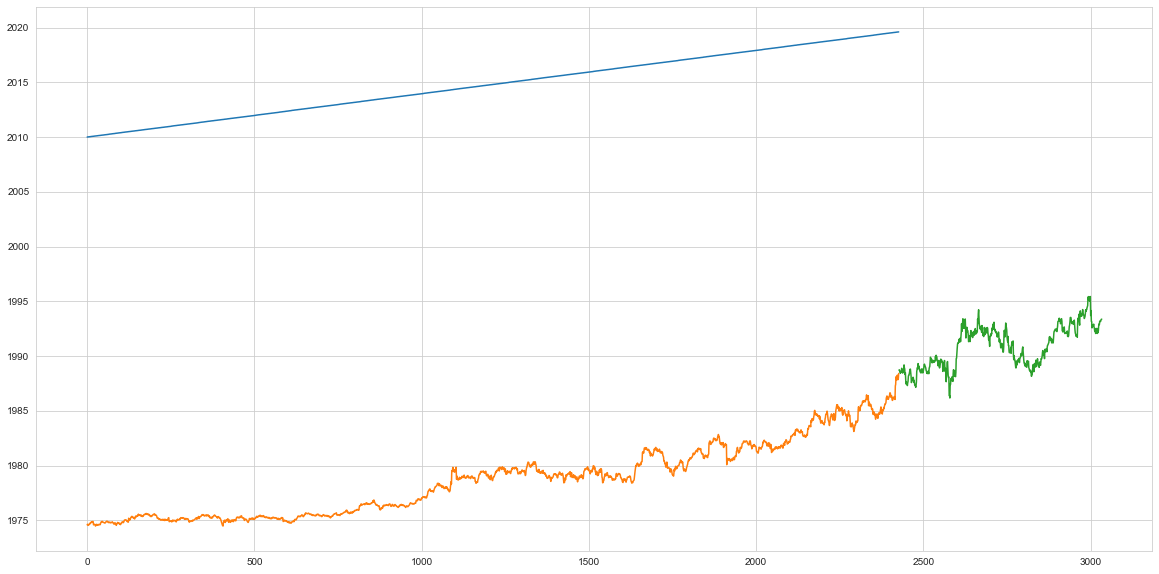

In [16]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train, label='Training')
plt.plot(test['Adj Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("AZN Adjusted Close Price - Moving Average", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend();

In [17]:
azn_adj['MA10'] =azn_adj['Adj Close'].rolling(200).mean()

In [18]:
#azn_adj['EMA10'] = azn_adj['Adj Close'].ewm(span=200, adjust=False).mean()
#azn_adj
weights = np.arange(1,201)
azn_adj['EMA10'] = azn_adj['Adj Close'].rolling(200).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

In [19]:
plt.style.use('fivethirtyeight')

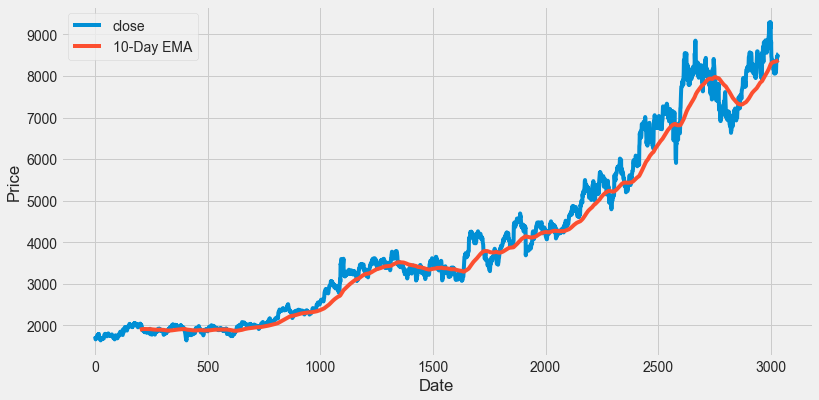

In [24]:
plt.figure(figsize = (12,6))
plt.plot(azn_adj['Adj Close'], label="close")
plt.plot(azn_adj['EMA10'], label="10-Day EMA")
#plt.plot(azn_adj['MA10'], label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [21]:

import plotly.express as px 

In [ ]:
fig = px.line(azn_adj, x='Date', y=azn_adj.columns[0:4])



In [ ]:
fig.show()

In [90]:
rmse = np.sqrt(np.mean(np.power((np.array(azn_adj['Adj Close'])-azn_adj['EMA10']),2)))

In [91]:
rmse

87.79752855061814

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
data = yf.download("AZN.L", start="2010-01-01", end="2022-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [39]:
data_X = data.iloc[:,1:5]
data_X

,Open,High,Low,Close
Date,,,,
2009-12-31,2913.5,2929.0,2892.00,2910.5
2010-01-04,2912.0,2946.0,2912.00,2941.0
2010-01-05,2936.0,2949.5,2901.00,2907.5
2010-01-06,2909.0,2909.0,2850.50,2875.0
2010-01-07,2879.0,2925.5,2879.00,2910.5
...,...,...,...,...
2021-12-23,8633.0,8653.0,8556.00,8596.0
2021-12-24,8613.0,8676.0,8608.49,8611.0
2021-12-29,8657.0,8720.0,8651.55,8656.0


In [40]:
data_X = data.iloc[:,1:5]
data_Y = data['Adj Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())




Training Set
              Open     High      Low   Close
Date                                        
2010-09-03  3285.5  3328.00  3282.50  3310.5
2018-11-30  6172.0  6209.00  6117.00  6117.0
2015-06-22  4234.5  4375.55  4193.78  4242.0
2018-11-09  6118.0  6217.00  6069.00  6172.0
2018-10-25  5830.0  5839.00  5615.00  5812.0
Date
2010-09-03    2011.67
2018-11-30    5504.65
2015-06-22    3300.35
2018-11-09    5554.15
2018-10-25    5230.19
Name: Adj Close, dtype: float64


In [41]:
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [42]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.9951411492567256
Mean Squared Error :  21649.45050932066


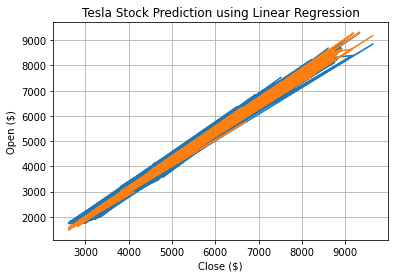

In [43]:
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Close ($)',ylabel='Open ($)', title='Tesla Stock Prediction using Linear Regression')
ax.plot(test_X['Open'],test_y)
ax.plot(test_X['Open'],predict_y)
fig.savefig('LRPlot.png')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
format(round(r2_score(test_y,predict_y), 3))

'0.995'

In [89]:
azn_df= yf.download("AZN.L", start="2010-01-01", end="2022-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [90]:
azn_adj['Date'] = pd.to_datetime(azn_adj.index, format='%Y-%m-%d')
azn_adj.index = azn_adj['Date']

In [91]:
azn_adj = pd.DataFrame(index=range(0,len(azn_df)),columns=['Date', 'Adj Close'])

for i in range(0,len(azn_df)):
     azn_adj['Date'][i] = azn_df.index[i]
     azn_adj['Adj Close'][i] = azn_df['Adj Close'][i]

In [92]:
def add_datepart(df, fldname, drop=True, time=False):
    """
    Helper function that adds columns relevant to a date.
    """
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [93]:
add_datepart(azn_adj, 'Date')
azn_adj.drop('Elapsed', axis=1, inplace=True)  # Elapsed is the time stamp

In [94]:
azn_adj.columns

Index(['Adj Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start'],
      dtype='object')

In [95]:
azn_adj['mon_fri'] = 0
for i in range(0,len(azn_adj)):
    if (azn_adj['Dayofweek'][i] == 0 or azn_adj['Dayofweek'][i] == 4):
        azn_adj['mon_fri'][i] = 1
    else:
        azn_adj['mon_fri'][i] = 0

In [96]:
split = int(0.8*len(azn_adj))

In [97]:
train, test = azn_adj[:split], azn_adj[split:]

In [98]:
azn_adj.shape, train.shape, test.shape

((3034, 14), (2427, 14), (607, 14))

In [99]:
X_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
X_test = test.drop('Adj Close', axis=1)
y_test = test['Adj Close']

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2427, 13), (2427,), (607, 13), (607,))

,preds
0,5210.240450
1,5217.376028
2,5215.363549
3,5215.228995
4,5215.094440
...,...
602,6143.059857
603,6144.803226
604,6149.791770
605,6149.657215


In [101]:
model = LinearRegression()

# Train model
model.fit(X_train,y_train)

LinearRegression()

In [106]:
preds = model.predict(X_test)
preds.shape

(607,)

In [143]:
c = pd.DataFrame(preds, columns = ['preds'])
c

,preds
0,5210.240450
1,5217.376028
2,5215.363549
3,5215.228995
4,5215.094440
...,...
602,6143.059857
603,6144.803226
604,6149.791770
605,6149.657215


,index,Column_b


In [133]:
n = pd.DataFrame(y_test, columns = ['act'])


In [137]:
type(y_test)

pandas.core.series.Series

In [142]:
y_test.to_frame()
a=y_test.reset_index()
fully_final=a[[  'Adj Close']]

In [145]:
fully_final=pd.concat((fully_final,c) ,axis=1)

In [146]:
fully_final

,Adj Close,preds
0,6842.46,5210.240450
1,6822.91,5217.376028
2,6834.08,5215.363549
3,6766.13,5215.228995
4,6729.83,5215.094440
...,...,...
602,8457.35,6143.059857
603,8472.1,6144.803226
604,8516.38,6149.791770
605,8533.1,6149.657215


In [148]:
import plotly.express as px 
fig = px.line(fully_final, x=['preds'], y=fully_final.columns[0:2])


ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

AttributeError: 'builtin_function_or_method' object has no attribute 'round'

In [174]:
format(round(r2_score(y_test,preds), 1))

'-7.5'